# Lesson 0: Thinking Numpy
## Humble Beginnings
Emperor Charlemagne just graduated RWTH and is certain that Aachen is the perfect business location for his new start-up. This sentiment is not shared by everyone, as just a few years ago (400AD) Roman capital Inc. skipped town, taking with them centuries worth of machine learning and Python knowledge. Charlemagne however is in posession of an item he thinks can turn the luck of the town around: the NumPy user manual (BICE edition). Below you will find a faithful transcript of these ancient texts.

Python is an extremely expressive language - there is not much verbosity or scaffolding, but that makes it all the more important to understand what's going on under the hood to avoid pitfalls when certain expressions are used as part of big libraries like NumPy and PyTorch. Below are some of these expressions you might encounter:

In [1]:
!pip install seaborn pandas numpy==1.22.3 # RWTH >:(

## Logging

Let's introduce some nice features in Python that make writing machine learning code easier.

In [2]:
# logging
print("Hallo Welt")
some_var = 42
print(f"The answer to life, the universe, and everything: {some_var}")
print(f"The answer to life, the universe, and everything, with 2 decimals: {some_var:.2f}")
# short notation to print variables
print(f"{some_var=}")


Hallo Welt
The answer to life, the universe, and everything: 42
The answer to life, the universe, and everything, with 2 decimals: 42.00
some_var=42


## Collections

In [3]:
# ordered and immutable (unchangeable): tuples
t1 = (1, None, "hi")
try:
  t1[0] = 2  # illegal (!)
except TypeError:
  print("Can't modify tuples...")
print(t1)

# however, I can add:
t2 = t1
print(hash(t2), hash(t1))
t2 += ("another one",)
print(t2)
# but this incurs a copy!!
print(hash(t2), hash(t1))

Can't modify tuples...
(1, None, 'hi')
2688159898898529398 2688159898898529398
(1, None, 'hi', 'another one')
2582985757700453966 2688159898898529398


In [4]:
# ordered, but mutable: lists
l1 = [1, None, 'hi']
l1[0] = 2  # now legal
print(l1)

[2, None, 'hi']


In [5]:
# unordered, mutable and unique: sets
s1 = {1, None, 'hi'}
print(s1)

try:
  print(s1[0])
except TypeError:
  print("Can't access by index, since sets are unordered...")

print(s1.pop())

# we can convert lists/tuples to sets
numbers = [2, 4, 4, 5, 1, 2, 1, 1]
unique_numbers = set(numbers)
print(unique_numbers)

{None, 1, 'hi'}
Can't access by index, since sets are unordered...
None
{1, 2, 4, 5}


In [6]:
# indexing by name, mutable: dicts
d1 = {  # key: value
    'hallo': 'welt',
    'hallo': 2
}
d1['welt'] = 'hallo'
print(d1)

d1.update({'hallo': 3})
print(d1)

# everything that is "hashable" can be used as a key
print(f"{hash((1,2,3))=}")
d1[(1,2,3)] = 4
print(d1)

try:
  hash([1, 2, 3])
except TypeError:
  print("Indeed, lists are not hashable")

try:
  d1[[1, 2 ,3]] = 4
except TypeError:
  print("And we get a TypeError")

{'hallo': 2, 'welt': 'hallo'}
{'hallo': 3, 'welt': 'hallo'}
hash((1,2,3))=529344067295497451
{'hallo': 3, 'welt': 'hallo', (1, 2, 3): 4}
Indeed, lists are not hashable
And we get a TypeError


In [7]:
# now for something completely different: iterators
# lists, tuples, sets and dicts are 'iterable, i.e. you can do
some_tuple = (5, 3, 1, 2)
for elem in some_tuple:
  print(elem)
# but what if you need the index?
for idx, elem in enumerate(some_tuple):
  print(idx, elem)

print(sorted(some_tuple))  # it's a list?!?!?!


5
3
1
2
0 5
1 3
2 1
3 2
[1, 2, 3, 5]


In [8]:
# sort countries by highest tariff imposed, ascendingly
tariffs = [('China', 0.34),
 ('European Union', 0.2),
 ('Japan', 0.24),
 ('Vietnam', 0.46),
 ('South Korea', 0.25),
 ('Taiwan', 0.32),
 ('India', 0.26),
 ('United Kingdom', 0.1),
 ('Singapore', 0.1),
 ('Brazil', 0.1)]

# Default sort without any arguments: by key, then value
print(sorted(tariffs))

# sort is a function that takes another function; we can pass our own!
def custom_sort(x):
    return x[1] # get tariff value from dict
print(sorted(tariffs, key=custom_sort)) # only sorted by value!

print(sorted(tariffs, key=lambda x: x[1])) # same thing

[('Brazil', 0.1), ('China', 0.34), ('European Union', 0.2), ('India', 0.26), ('Japan', 0.24), ('Singapore', 0.1), ('South Korea', 0.25), ('Taiwan', 0.32), ('United Kingdom', 0.1), ('Vietnam', 0.46)]
[('United Kingdom', 0.1), ('Singapore', 0.1), ('Brazil', 0.1), ('European Union', 0.2), ('Japan', 0.24), ('South Korea', 0.25), ('India', 0.26), ('Taiwan', 0.32), ('China', 0.34), ('Vietnam', 0.46)]
[('United Kingdom', 0.1), ('Singapore', 0.1), ('Brazil', 0.1), ('European Union', 0.2), ('Japan', 0.24), ('South Korea', 0.25), ('India', 0.26), ('Taiwan', 0.32), ('China', 0.34), ('Vietnam', 0.46)]


In [9]:
cities = ["Vienna", "Aachen", "Berlin", "Madrid"]
print([f"This year, I'd like to travel to {city}" for city in cities])

average_döner_prices = { # do not use umlauts
    "Vienna": 7.0,
    "Berlin": 7.3,
    "Aachen": 6.5,
    "Madrid": 5.8
}

print([x for x in average_döner_prices]) # just the keys?
print([x for x in average_döner_prices.items()]) # back to tuples!
print([x for x in average_döner_prices.values()]) # just the values!

döner_lore = (f"Wow I can't believe a döner is only {price} in {city}!!" for city, price in average_döner_prices.items())
print(döner_lore) # oh no (not even a tuple?)
print([döner_lore]) # oh no pt. 2
print(list(döner_lore)) # unroll the generator expression


["This year, I'd like to travel to Vienna", "This year, I'd like to travel to Aachen", "This year, I'd like to travel to Berlin", "This year, I'd like to travel to Madrid"]
['Vienna', 'Berlin', 'Aachen', 'Madrid']
[('Vienna', 7.0), ('Berlin', 7.3), ('Aachen', 6.5), ('Madrid', 5.8)]
[7.0, 7.3, 6.5, 5.8]
<generator object <genexpr> at 0x7fbc704c0a50>
[<generator object <genexpr> at 0x7fbc704c0a50>]
["Wow I can't believe a döner is only 7.0 in Vienna!!", "Wow I can't believe a döner is only 7.3 in Berlin!!", "Wow I can't believe a döner is only 6.5 in Aachen!!", "Wow I can't believe a döner is only 5.8 in Madrid!!"]


# Python Riddles
In the time it took you to read all this, Charlemagne designed some tricky expressions to test your understanding. Good luck!

In [10]:
fns = [lambda: i for i in range(5)]
for fn in fns:
  print(fn())

4
4
4
4
4


In [11]:
def f(x=[1]):
  x += [1]
  print(x)

f()
f()
f()

[1, 1]
[1, 1, 1]
[1, 1, 1, 1]


In [12]:
def f(x=(1,)):
  x += (1,)
  print(x)

f()
f()
f()

(1, 1)
(1, 1)
(1, 1)


## Thinking in tensors - torch & PyTorch
Word on the street is that abstract art is making a comeback, which is why Charlemagne's board has commissioned a modified painting of the startup HQ. To get started, we will want to tile the image:

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import itertools
import torch
import requests
from io import BytesIO

# fetch our desired image from web
charlemagne_url = "https://cdn.pixabay.com/photo/2017/12/21/16/46/architecture-3032171_960_720.jpg"
response = requests.get(charlemagne_url)

charlemagne_img = Image.open(BytesIO(response.content))

charlemagne_array = torch.tensor(np.array(charlemagne_img)) # convert to NumPy first because it automatically handles the Image -> matrix conversion

# we want to make a mosaic
num_rows = 3
num_cols = 3
print(charlemagne_array.shape)
# height, width = charlemagne_array.shape # destruct a tuple!
height, width, num_channels = charlemagne_array.shape # but we need to account for all dimensions
print(height, width, num_channels)

torch.Size([640, 960, 3])
640 960 3


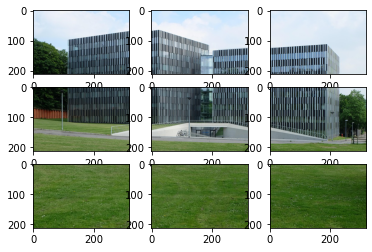

In [14]:
# NumPy and Torch are row-major
tile_height = height // num_cols
tile_width = width // num_rows

img_tiles = []

for row, col in itertools.product(range(num_rows), range(num_cols)): # iterate over cartesian product (3x3 grid items)
  y_start = row * tile_height
  y_end = (row + 1) * tile_height

  x_start = col * tile_width
  x_end = (col + 1) * tile_width

  img_tile = charlemagne_array[y_start:y_end, x_start:x_end, :]
  img_tiles.append(img_tile) # never append to a NumPy array or torch tensor directly! Creates duplicates.


 # convert afterwards outside of the loop!


#  we can't use .tensor because we have a list of NumPy arrays
# img_tiles = torch.tensor(img_tiles)

# if we do this it will concatenate along the outermost dimension; (num_rows*num_cols*height, width, channels). Not what we want!
# img_tiles = torch.cat(img_tiles)


# so we need to add another dimension for the grid items...
# either manually (we can use 'None' in indexing to add a singleton dimension!)
# img_tiles = torch.cat([tile[None, :, :, :] for tile in img_tiles])

# or automatically with .stack!
img_tiles = torch.stack(img_tiles, dim = 0) # this is now (num_rows*num_cols, height, width, channels). Yay!


# show the result
fig, axes = plt.subplots(3, 3) # grid of images
axes = axes.flatten() # sometimes it's nicer to have a 1D view (0-9) for convenience
for img_idx in range(0, 9):
  axes[img_idx].imshow(img_tiles[img_idx])
plt.show() # fractured charlemagne

In [15]:
# let's use the charlemagne  grid to make a jigsaw puzzle
jigsaw_indices = torch.randperm(num_cols * num_rows) # creates 1D permutation of our row-col indices
print(jigsaw_indices)

tensor([4, 2, 0, 7, 6, 8, 1, 3, 5])


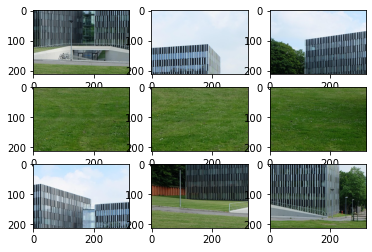

In [16]:
# we don't need to explicitly specify ':' for each fully selected dimension
# jigsaw_tiles = img_tiles[jigsaw_indices, :, :, :]

jigsaw_tiles = img_tiles[jigsaw_indices] # index by indices!

# show the result (code duplication!!!)
fig, axes = plt.subplots(3, 3) # grid of images
axes = axes.flatten() # sometimes it's nicer to have a 1D view (0-9) for convenience
for img_idx in range(0, 9):
  axes[img_idx].imshow(jigsaw_tiles[img_idx])
plt.show() # shuffled charlemagne

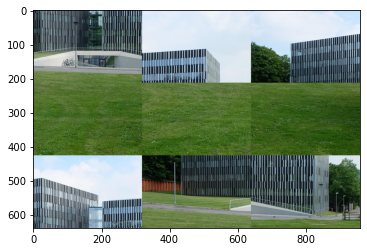

In [17]:
# Already let's re-assemble jigsaw'd Charlemagne
# [patches, height, width, channels]

# oh no integer division stole our pixels
# restored_charlemagne = jigsaw_tiles.reshape(charlemagne_array.shape)

# let's extrapolate back from our tiles (.reshape would create a copy)
restored_charlemagne = jigsaw_tiles.view(tile_height * num_rows, tile_width * num_cols, num_channels)
# this is super scuffed! .reshape does not take the order into account!
# plt.imshow(restored_charlemagne)

# first, deconstruct into individual 'patches' for height and width
restored_charlemagne = (
    jigsaw_tiles
      .view(num_rows, num_cols, tile_height, tile_width, num_channels) # we can chain calls!
      .permute(0, 2, 1, 3, 4) # change to [row, height, col, width, channels]
      .reshape(tile_height * num_rows, tile_width * num_cols, num_channels)
)
plt.imshow(restored_charlemagne) # hang it in the louvre

In [18]:
jigsaw_tiles.shape

torch.Size([9, 213, 320, 3])

# Cosine Distance
The board is pleased with the results! That concludes your duties for the day, and Charlemagne suggests that you may go outside to 'touch grass'. However, to touch grass we must first identify it - using the cosine distance between our image patches!

In [19]:
import torch.nn.functional as F

n_tiles, *_ = jigsaw_tiles.shape # *_ to skip all other destruction fields; equivalent num_rows*num_cols
jigsaw_features = jigsaw_tiles.view(n_tiles, -1).float() / 255 # merge all other dimensions into one and normalize to range [0, 1.0]
print(jigsaw_features)
jigsaw_features_norm = F.normalize(jigsaw_features, dim=-1) # different kind of normalization! we want all features to have the same magnitude

tensor([[0.1059, 0.0941, 0.1216,  ..., 0.3373, 0.4510, 0.1922],
        [0.8863, 0.9333, 0.9804,  ..., 0.8667, 0.9020, 0.9294],
        [0.6941, 0.8706, 1.0000,  ..., 0.0980, 0.0941, 0.1255],
        ...,
        [0.7725, 0.8941, 1.0000,  ..., 0.1412, 0.1373, 0.1608],
        [0.0157, 0.0314, 0.0275,  ..., 0.4235, 0.4667, 0.3020],
        [0.1373, 0.1608, 0.2157,  ..., 0.3137, 0.4275, 0.1647]])


In [20]:
# To compute the dot products, we compute the element-wise products (a_i * b_i). We compute the sum in the next step.
# Here we see "broadcasting" at work: the shapes are (1, n_tiles, dim) * (n_tiles, 1, dim) -> (n_tiles, n_tiles, dim)
# i.e. we pretend that the "1" axis is repeated `n_tiles` times, without actually repeating it on memory!
jigsaw_cosine_similarities = jigsaw_features_norm[None, :, :] * jigsaw_features_norm[:, None, :]
jigsaw_cosine_similarities.shape # create 9x9 similarity matrix!

torch.Size([9, 9, 204480])

In [21]:
# Patch-to-patch similarity
jigsaw_cosine_similarities = jigsaw_cosine_similarities.sum(-1)
jigsaw_cosine_similarities.shape

torch.Size([9, 9])

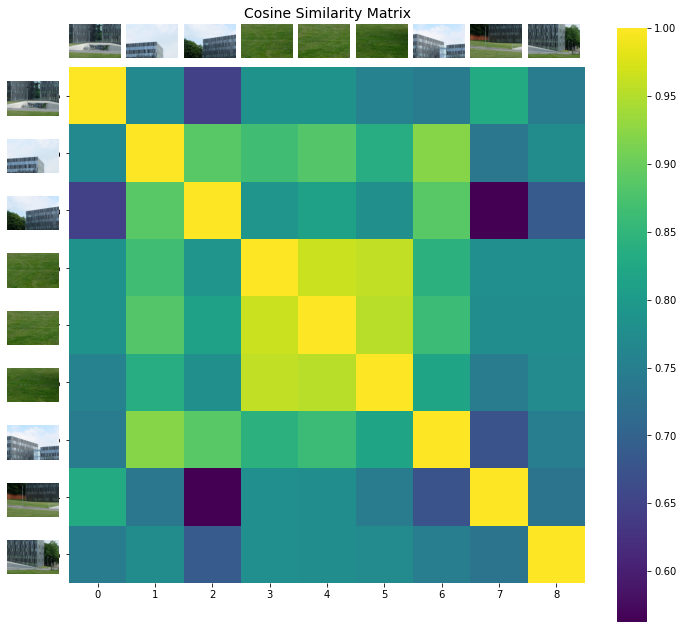

In [22]:
# Ignore, visualization!
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(jigsaw_cosine_similarities, cmap='viridis', square=True, cbar=True, ax=ax)

def add_tile_images(ax, tiles, size=0.1):
    n = len(tiles)
    for i in range(n):
        img = tiles[i]
        imagebox = ax.inset_axes([i / n, 1.0, size, size])
        imagebox.imshow(img)
        imagebox.axis("off")

        img = tiles[i]
        imagebox = ax.inset_axes([-0.12, (n - i - 1) / n, size, size])
        imagebox.imshow(img)
        imagebox.axis("off")

add_tile_images(ax, jigsaw_tiles)

plt.title("Cosine Similarity Matrix", fontsize=14)
plt.tight_layout()
plt.show()

Usually you would apply a distance function to a more refined feature vector to capture more details, but in our case it worked quite well!

Now let's try to programmatically select the indices with the highest similarity.

In [23]:
# For each patch, find the three most similar patches
jigsaw_3nn_scores, jigsaw_3nn_indices = jigsaw_cosine_similarities.topk(3, dim=-1)
jigsaw_cosine_similarities.shape, jigsaw_3nn_scores.shape, jigsaw_3nn_indices.shape

(torch.Size([9, 9]), torch.Size([9, 3]), torch.Size([9, 3]))

In [24]:
# Find the most similar triplet of patches
jigsaw_3nn_scores.mean(-1), jigsaw_3nn_scores.mean(-1).topk(3)

(tensor([0.8719, 0.9357, 0.9242, 0.9745, 0.9728, 0.9702, 0.9353, 0.8694, 0.8514]),
 torch.return_types.topk(
 values=tensor([0.9745, 0.9728, 0.9702]),
 indices=tensor([3, 4, 5])))

Indeed, these are the grass patches!
But the pairwise dot-product is a bit hard to read.
There is a better way: the **Einstein summation convention**.
~Wikipedia~ *Etymologiae* [Isodore of Seville et al., 625] states:

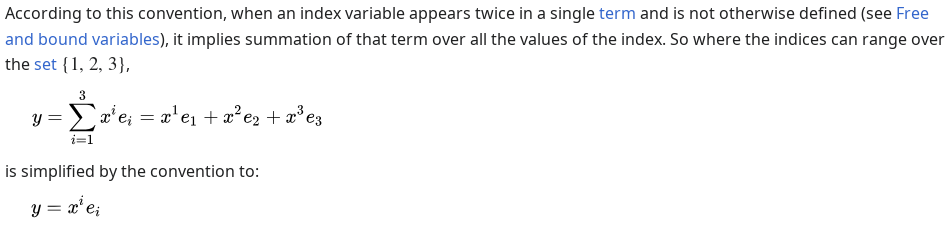

In [25]:
# Matrix multiplication
some_matrix = torch.tensor([
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0]]
)
some_matrix @ some_matrix

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [26]:
# in einstein's sum notation
torch.einsum('ij,jk->ik', some_matrix, some_matrix)

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

So, what would the pairwise dot-product look like?

In [27]:
# recall: this is equivalent to
# (jigsaw_features_norm[None, :, :] * jigsaw_features_norm[:, None, :]).sum(-1)
jigsaw_cosine_similarities_einstein = torch.einsum('pc,qc -> pq', jigsaw_features_norm, jigsaw_features_norm)
jigsaw_cosine_similarities_einstein

tensor([[1.0000, 0.7683, 0.6451, 0.7858, 0.7864, 0.7570, 0.7450, 0.8292, 0.7435],
        [0.7683, 1.0000, 0.8869, 0.8653, 0.8833, 0.8356, 0.9201, 0.7363, 0.7731],
        [0.6451, 0.8869, 1.0000, 0.7905, 0.8116, 0.7808, 0.8858, 0.5627, 0.6859],
        [0.7858, 0.8653, 0.7905, 1.0000, 0.9655, 0.9579, 0.8428, 0.7790, 0.7795],
        [0.7864, 0.8833, 0.8116, 0.9655, 1.0000, 0.9528, 0.8600, 0.7770, 0.7747],
        [0.7570, 0.8356, 0.7808, 0.9579, 0.9528, 1.0000, 0.8175, 0.7452, 0.7708],
        [0.7450, 0.9201, 0.8858, 0.8428, 0.8600, 0.8175, 1.0000, 0.6742, 0.7462],
        [0.8292, 0.7363, 0.5627, 0.7790, 0.7770, 0.7452, 0.6742, 1.0000, 0.7294],
        [0.7435, 0.7731, 0.6859, 0.7795, 0.7747, 0.7708, 0.7462, 0.7294, 1.0000]])

In [28]:
(jigsaw_cosine_similarities == jigsaw_cosine_similarities_einstein).all()  # should be false

tensor(False)

In [29]:
torch.isclose(jigsaw_cosine_similarities, jigsaw_cosine_similarities_einstein).all()

tensor(True)